In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
ad = sc.read("export_data/fly_cell_atlas_uce_adata_33layer_umap.h5ad")

/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/anndata/_core/anndata.py:1825: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
ad = ad[(~ad.obs["broad_annotation"].isin(["unknown", "artefact"]))].copy()
ad
ad.obs["broad_annotation"].value_counts()

/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/anndata/_core/anndata.py:1825: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


broad_annotation
epithelial cell                           68058
muscle system                             52004
sensory organ cell                        29543
neuron                                    28568
Skeletor positive cells                   20793
female reproductive system                19068
fat body                                  17125
tracheal cell                             10794
germline cell                             10071
excretory system                           9386
hemocyte                                   7899
oenocyte                                   7588
glial cell                                 7080
gut cell                                   6629
male reproductive system                   4454
fat cell                                   2488
pigment cell                               2014
gland                                      1462
somatic precursor cell                      795
mechanosensory neuron  of haltere           678
cardial cell           

In [4]:
ad.obs["broad_annotation"].value_counts()

broad_annotation
epithelial cell                           68058
muscle system                             52004
sensory organ cell                        29543
neuron                                    28568
Skeletor positive cells                   20793
female reproductive system                19068
fat body                                  17125
tracheal cell                             10794
germline cell                             10071
excretory system                           9386
hemocyte                                   7899
oenocyte                                   7588
glial cell                                 7080
gut cell                                   6629
male reproductive system                   4454
fat cell                                   2488
pigment cell                               2014
gland                                      1462
somatic precursor cell                      795
mechanosensory neuron  of haltere           678
cardial cell           

In [5]:
#sc.pp.neighbors(ad, use_rep="X_uce") # already calculated

In [6]:
#sc.tl.umap(ad) # already calculated

In [7]:
sc.set_figure_params(vector_friendly=True, dpi_save=300)

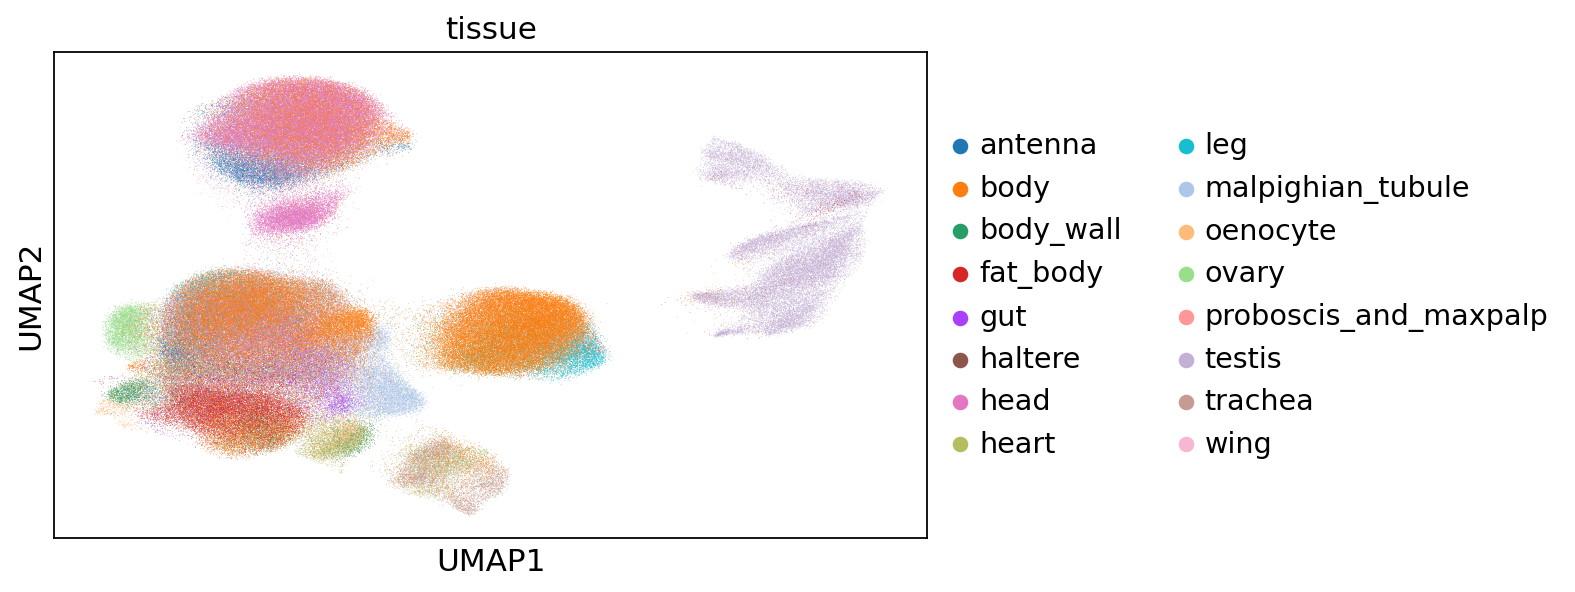

In [8]:
fig, ax = plt.subplots(figsize=(7, 4))   # inches
sc.pl.umap(ad, color=["tissue"], ax=ax, show=False)
plt.savefig("sfig_fly_umap_tissue.svg", bbox_inches="tight")

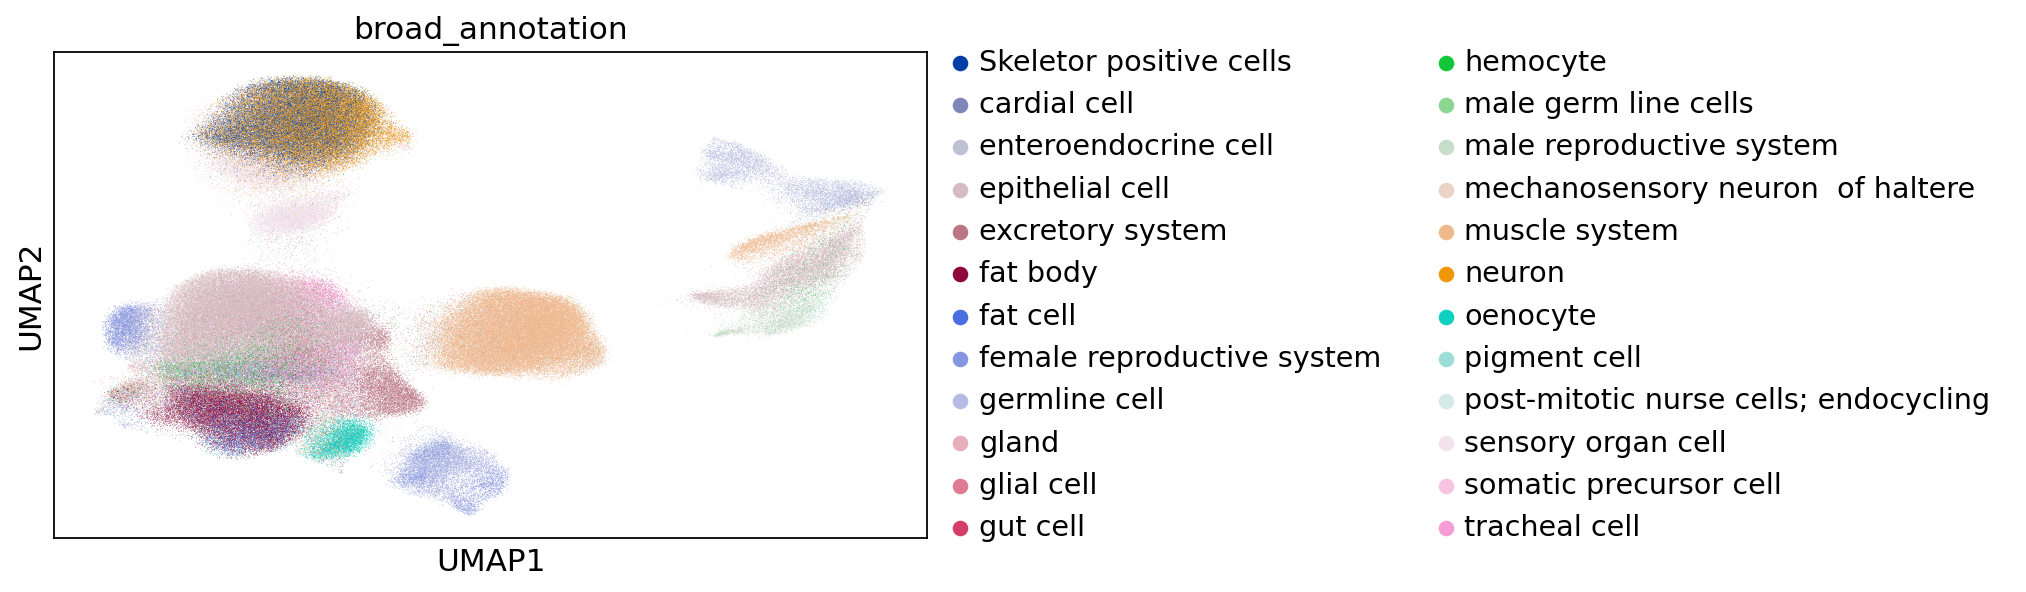

In [9]:
fig, ax = plt.subplots(figsize=(7, 4))   # inches
sc.pl.umap(ad, color=["broad_annotation"], ax=ax, show=False)
plt.savefig("sfig_fly_umap_ba.svg", bbox_inches="tight")

# Dendrograms

In [10]:
gut_ad = ad[ad.obs["tissue"] == "gut"].copy()
vcs = gut_ad.obs["consensus_community_annotation"].value_counts()
keep_cts = list(vcs[vcs >= 100].index)
gut_ad = gut_ad[gut_ad.obs["consensus_community_annotation"].isin(keep_cts)]

gut_ad.obs["consensus_community_annotation"].value_counts()

/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/anndata/_core/anndata.py:1825: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


consensus_community_annotation
crop                                              4315
Enterocyte-like                                   1150
cardia, R0 midgut region                           978
enterocyte of anterior adult midgut epithelium     734
intestinal stem cell                               299
hindgut                                            278
adult differentiating enterocyte                   272
visceral muscle                                    253
middle midgut                                      229
enteroblast                                        224
visceral muscle of the crop                        200
adult hindgut epithelium                           184
Name: count, dtype: int64

In [11]:
sc.pp.neighbors(gut_ad, use_rep="X_uce")

/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/anndata/_core/anndata.py:1825: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [12]:
gut_ad.obs["consensus_community_annotation"].value_counts()

consensus_community_annotation
crop                                              4315
Enterocyte-like                                   1150
cardia, R0 midgut region                           978
enterocyte of anterior adult midgut epithelium     734
intestinal stem cell                               299
hindgut                                            278
adult differentiating enterocyte                   272
visceral muscle                                    253
middle midgut                                      229
enteroblast                                        224
visceral muscle of the crop                        200
adult hindgut epithelium                           184
Name: count, dtype: int64

In [13]:
sc.tl.dendrogram(gut_ad, use_rep="X_uce", groupby="consensus_community_annotation")

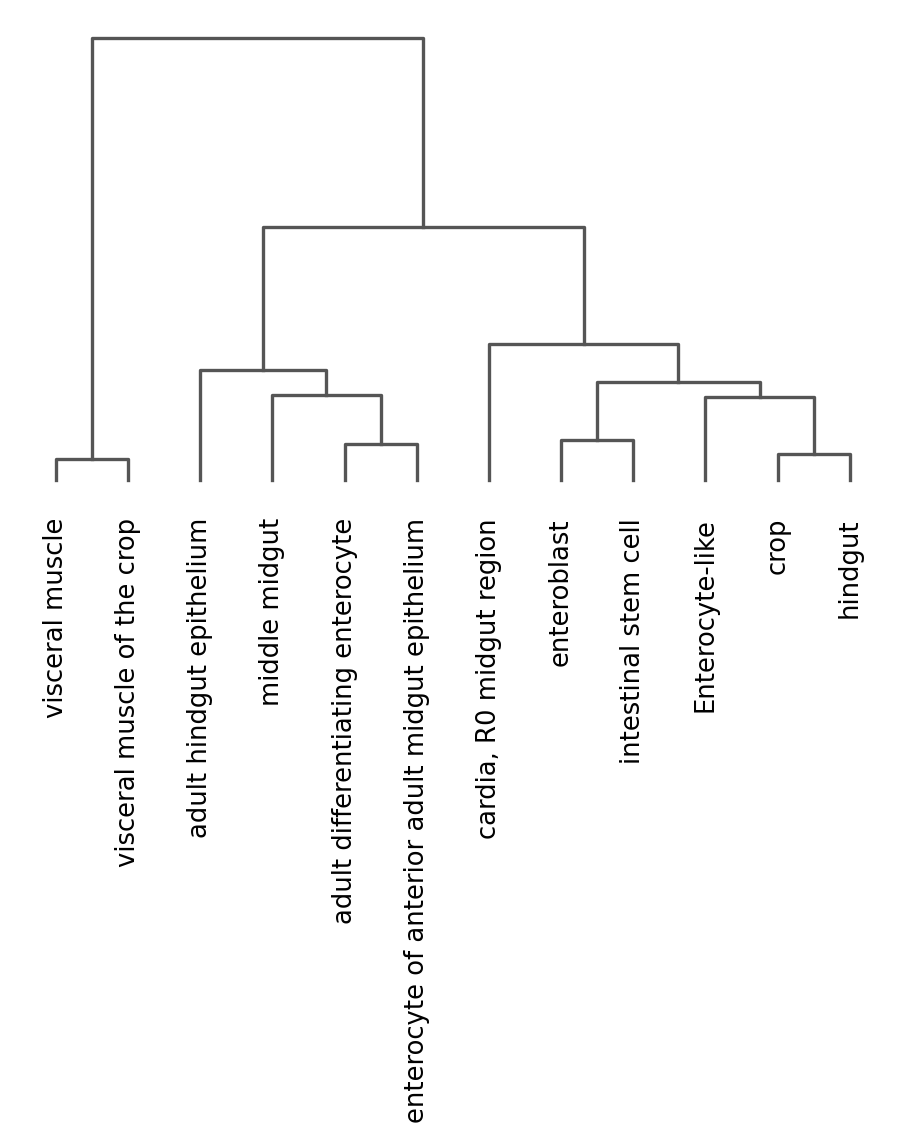

In [14]:
fig, ax = plt.subplots(figsize=(7, 4))   # inches

sc.pl.dendrogram(gut_ad, groupby="consensus_community_annotation", ax=ax, show=False)
plt.savefig("sfig_fly_gutD.svg", bbox_inches="tight")

In [15]:
head_ad = ad[ad.obs["tissue"] == "head"].copy()
vcs = head_ad.obs["consensus_community_annotation"].value_counts()
keep_cts = list(vcs[vcs >= 100].index)
head_ad = head_ad[head_ad.obs["consensus_community_annotation"].isin(keep_cts)]

head_ad.obs["consensus_community_annotation"].value_counts()


/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/anndata/_core/anndata.py:1825: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


consensus_community_annotation
Skeletor positive cells                           20793
cone cell                                          6281
outer photoreceptor cell                           5719
epidermal cell                                     5509
pigment cell                                       1608
olfactory receptor neuron                          1094
lamina monopolar neuron L2                          938
adult reticular neuropil associated glial cell      911
lamina monopolar neuron L3                          881
ensheathing glial cell                              833
transmedullary neuron Tm1                           783
auditory sensory neuron                             770
lamina monopolar neuron L1                          742
medullary intrinsic neuron Mi1                      722
photoreceptor cell R8                               711
medullary intrinsic neuron Mi4                      661
transmedullary neuron Tm2                           653
gamma Kenyon cell

In [16]:
sc.tl.dendrogram(head_ad, use_rep="X_uce", groupby="consensus_community_annotation")

/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:192: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat
/lfs/ampere5/0/yanay/env/micromamba/envs/dogma/lib/python3.11/site-packages/anndata/_core/anndata.py:1825: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


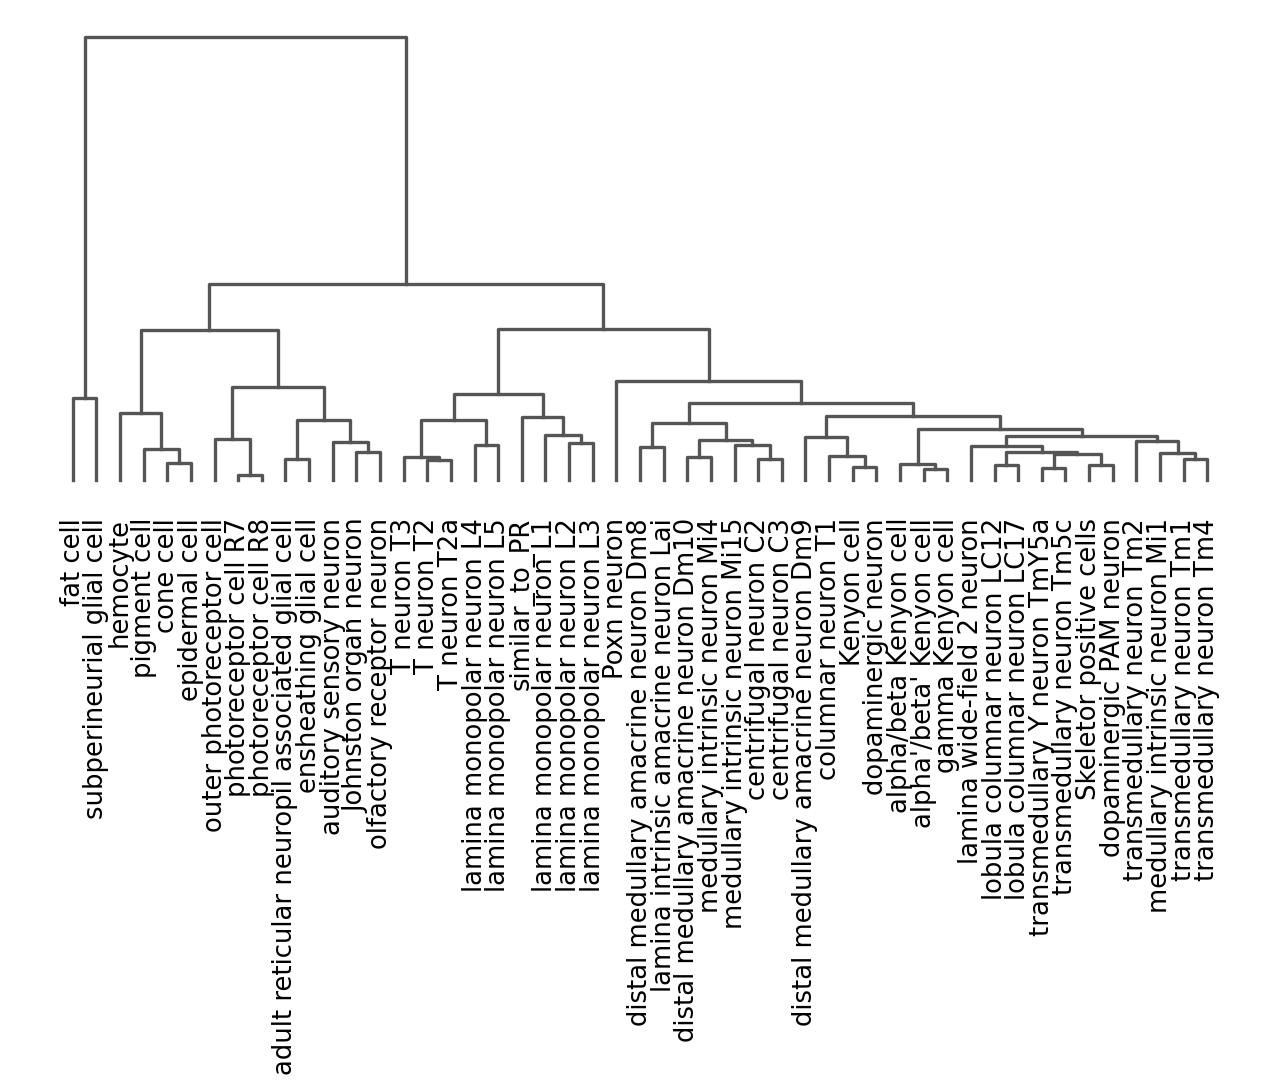

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))   # inches

sc.pl.dendrogram(head_ad, groupby="consensus_community_annotation", ax=ax, show=False)
plt.savefig("sfig_fly_headD.svg", bbox_inches="tight")